# quant-econ Solutions: Uncertainty Traps

Solutions for http://quant-econ.net/py/uncertainty_traps.html

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
from uncertainty_traps import UncertaintyTrapEcon

/home/matthewmckay/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Exercise 1

This exercise asked you to validate the laws of motion for $\gamma$ and $\mu$ given in the lecture, based on the stated result about Bayesian updating in a scalar Gaussian setting.  The stated result tells us that after observing average output $X$ of the $M$ firms, our posterior beliefs will be

$$
    N(\mu_0, 1/\gamma_0)
$$

where

$$
    \mu_0 = \frac{\mu \gamma + M X \gamma_x}{\gamma + M \gamma_x}
    \quad \text{and} \quad
    \gamma_0 = \gamma + M \gamma_x
$$

If we take a random variable $\theta$ with this distribution and then evaluate the distribution of $\rho \theta + \sigma_\theta w$ where $w$ is independent and standard normal, we get the expressions for $\mu'$ and $\gamma'$ given in the lecture.

### Exercise 2

First let's replicate the plot that illustrates the law of motion for precision, which is

$$
    \gamma_{t+1} = 
        \left(
        \frac{\rho^2}{\gamma_t + M \gamma_x} + \sigma_\theta^2
        \right)^{-1}
$$

Here $M$ is the number of active firms.  The next figure plots $\gamma_{t+1}$ against $\gamma_t$ on a 45 degree diagram for different values of $M$

/home/matthewmckay/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


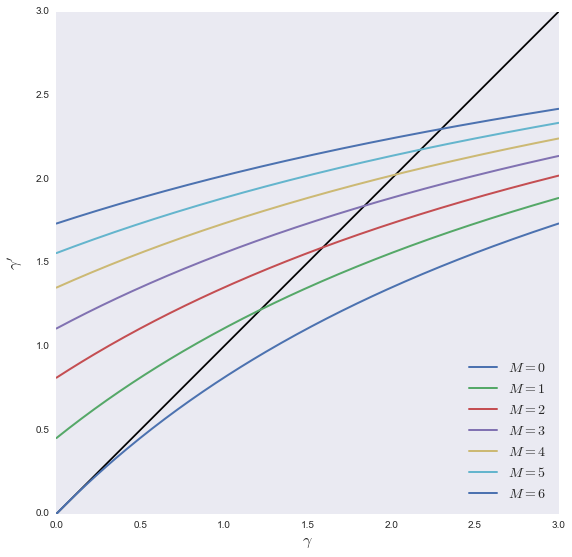

In [3]:
palette = itertools.cycle(sns.color_palette())
econ = UncertaintyTrapEcon()
rho, sig_theta, gx = econ.rho, econ.sig_theta, econ.gx # simplify names
g = np.linspace(1e-10, 3, 200)  # gamma grid
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(g, g, 'k-') # 45 degree line
for M in range(7):
    g_next = 1 / (rho**2 / (g + M * gx) + sig_theta**2)
    label_string = r"$M = {}$".format(M)
    ax.plot(g, g_next, lw=2, label=label_string, color=next(palette))
ax.legend(loc='lower right', fontsize=14)
ax.set_xlabel(r'$\gamma$', fontsize=16)
ax.set_ylabel(r"$\gamma'$", fontsize=16)
ax.grid()
plt.show()

The points where the curves hit the 45 degree lines are the long run steady states corresponding to each $M$, if that value of $M$ was to remain fixed.   As the number of firms falls, so does the long run steady state of precision.

Next let's generate time series for beliefs and the aggregates -- that is, the number
of active firms and average output.

In [4]:
sim_length=2000

mu_vec = np.empty(sim_length)
theta_vec = np.empty(sim_length)
gamma_vec = np.empty(sim_length)
X_vec = np.empty(sim_length)
M_vec = np.empty(sim_length)

mu_vec[0] = econ.mu
gamma_vec[0] = econ.gamma
theta_vec[0] = 0

w_shocks = np.random.randn(sim_length)

for t in range(sim_length-1):
    X, M = econ.gen_aggregates()
    X_vec[t] = X
    M_vec[t] = M

    econ.update_beliefs(X, M)
    econ.update_theta(w_shocks[t])

    mu_vec[t+1] = econ.mu
    gamma_vec[t+1] = econ.gamma
    theta_vec[t+1] = econ.theta

# Record final values of aggregates
X, M = econ.gen_aggregates()
X_vec[-1] = X
M_vec[-1] = M

First let's see how well $\mu$ tracks $\theta$ in these simulations

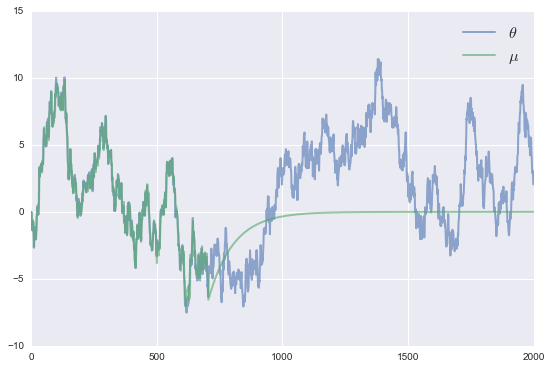

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(range(sim_length), theta_vec, alpha=0.6, lw=2, label=r"$\theta$")
ax.plot(range(sim_length), mu_vec, alpha=0.6, lw=2, label=r"$\mu$")
ax.legend(fontsize=16)
plt.show()

Now let's plot the whole thing together

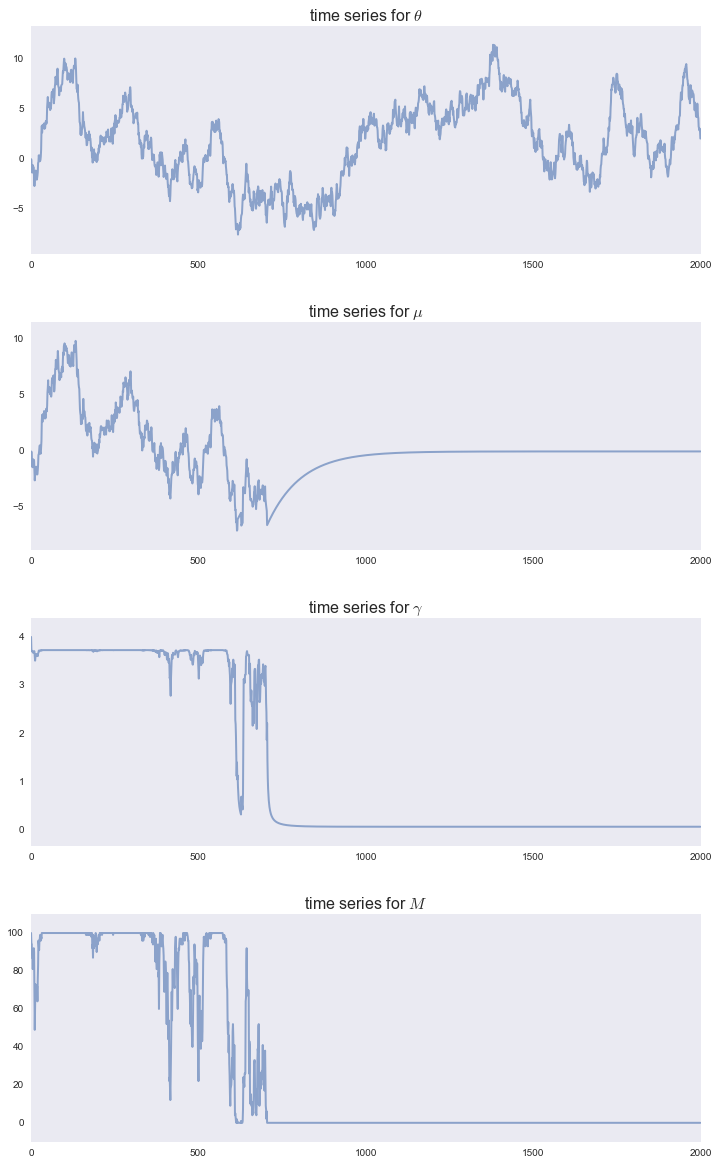

In [6]:
fig, axes = plt.subplots(4, 1, figsize=(12, 20))
# Add some spacing
fig.subplots_adjust(hspace=0.3)

series = (theta_vec, mu_vec, gamma_vec, M_vec)
names = r'$\theta$', r'$\mu$', r'$\gamma$', r'$M$'

for ax, vals, name in zip(axes, series, names):
    # determine suitable y limits
    s_max, s_min = max(vals), min(vals)
    s_range = s_max - s_min
    y_max = s_max + s_range * 0.1
    y_min = s_min - s_range * 0.1
    ax.set_ylim(y_min, y_max)
    # Plot series
    ax.plot(range(sim_length), vals, alpha=0.6, lw=2)
    ax.set_title("time series for {}".format(name), fontsize=16)
    ax.grid()

plt.show()

If you run the code above you'll get different plots, of course.  Try experimenting with different parameters to see the effects on the time series.  (It would also be interesting to experiment with non-Gaussian distributions for the shocks, but this is a big exercise since it takes us outside the world of the standard Kalman filter.)